In [1]:
import sklearn

from sklearn.datasets import make_circles

#Make 1000 samples
n_sample = 1000

# Cretae circles
X, y = make_circles(n_sample,
                     noise=0.03,
                     random_state=42)
len(X), len(y)
X.dtype


dtype('float64')

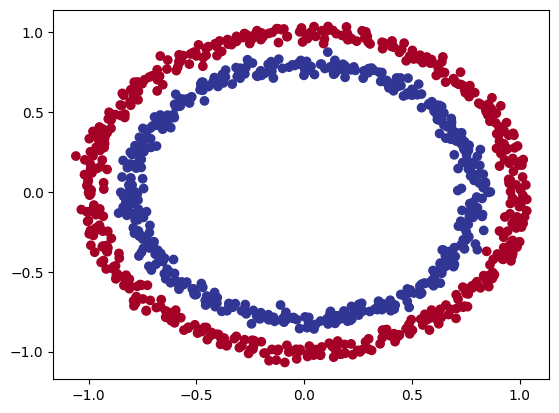

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y= X[:,1],
           c=y,
           cmap = plt.cm.RdYlBu)

In [3]:
import torch
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

## Build and train with NonLinearty

In [4]:
from torch import nn
class CircleModelNonLinearV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=16)
        self.layer3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x:torch.tensor)-> torch.Tensor:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
        #return self.layer3((self.relu(self.layer1(x))))

model_3 = CircleModelNonLinearV0()
model_3

CircleModelNonLinearV0(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
## Loss fn and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(),lr=0.001)

In [6]:

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

helper_functions.py already exists, skipping download


### Train and Test

In [7]:
torch.manual_seed(42)
from torch import round, sigmoid

epochs = 400
epochs_to_skip_before_print=10

for epoch in range(epochs):
    #Training 
    model_3.train()
    
    # 1 fwd pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2 calc loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3 zero grad
    optimizer.zero_grad()
    
    # 4 loss backword
    loss.backward()
    
    
    # 5 optimizer step
    optimizer.step()
    
    #Testing loop
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = round(sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        #Print
        if epoch % epochs_to_skip_before_print == 0:
            print(f"# {epoch} | Loss : {loss:.5f} acc : {acc:.2f}% | test_loss : {test_loss:.5f} test acc = {test_acc:.2f}% ")
        

# 0 | Loss : 0.70350 acc : 50.00% | test_loss : 0.70271 test acc = 50.00% 
# 10 | Loss : 0.69737 acc : 50.00% | test_loss : 0.69761 test acc = 50.00% 
# 20 | Loss : 0.69369 acc : 50.00% | test_loss : 0.69433 test acc = 50.00% 
# 30 | Loss : 0.69079 acc : 48.38% | test_loss : 0.69182 test acc = 46.50% 
# 40 | Loss : 0.68796 acc : 52.12% | test_loss : 0.68932 test acc = 49.50% 
# 50 | Loss : 0.68488 acc : 52.88% | test_loss : 0.68688 test acc = 51.00% 
# 60 | Loss : 0.68187 acc : 59.38% | test_loss : 0.68469 test acc = 54.50% 
# 70 | Loss : 0.67858 acc : 57.25% | test_loss : 0.68252 test acc = 55.50% 
# 80 | Loss : 0.67490 acc : 58.75% | test_loss : 0.68008 test acc = 54.50% 
# 90 | Loss : 0.67067 acc : 59.00% | test_loss : 0.67703 test acc = 56.00% 
# 100 | Loss : 0.66590 acc : 59.38% | test_loss : 0.67398 test acc = 56.00% 
# 110 | Loss : 0.66084 acc : 60.50% | test_loss : 0.67071 test acc = 55.50% 
# 120 | Loss : 0.65520 acc : 61.12% | test_loss : 0.66702 test acc = 57.00% 
# 130 | Lo

In [8]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6973,  0.2520],
                      [-1.2520,  0.2431],
                      [-1.1314, -0.7361],
                      [ 1.2303,  0.9849],
                      [ 0.5600, -0.7733],
                      [-0.9020,  0.1671],
                      [-1.0441,  1.0662],
                      [-0.4105,  1.2027],
                      [-0.3525,  0.7785],
                      [-0.5849, -0.6952],
                      [-0.1006,  1.1668],
                      [ 0.4717,  1.3005],
                      [ 0.8807, -0.0910],
                      [-0.2267,  0.6576],
                      [-0.3317,  0.7116],
                      [ 0.3629, -0.5635]])),
             ('layer1.bias',
              tensor([ 1.0678, -0.0469, -0.2878, -0.4600,  0.0046, -0.2038, -0.1951, -0.2137,
                       1.0909, -0.1275, -0.1298, -0.2779, -0.0921,  0.7050,  0.8593,  1.0566])),
             ('layer2.weight',
              tensor([[-0.1846,  0.4400,  0

## Visualize visulaize !!!

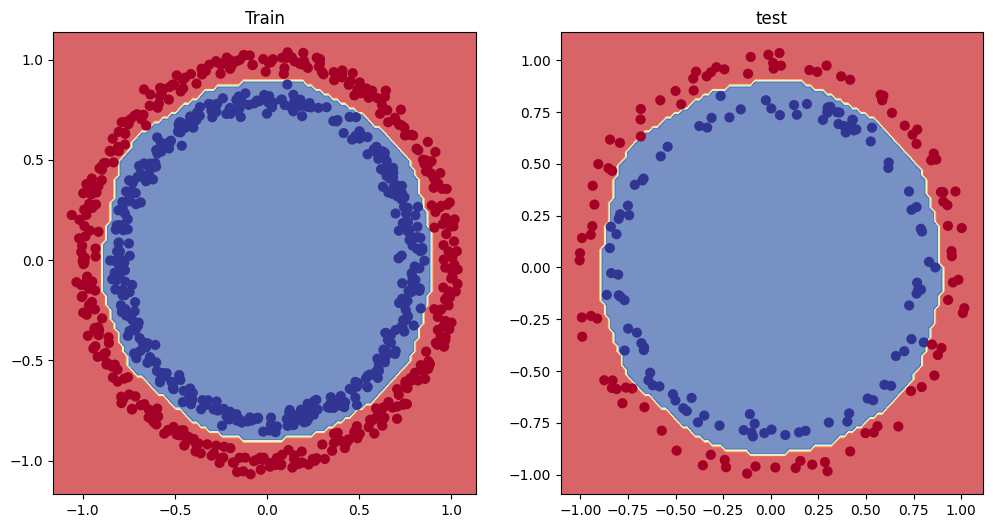

In [9]:
#Plot the decison boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

In [10]:
## some plotng of non linear function
